# 在Python中像dplyr那样操纵数据框

## dplython包

In [1]:
import pandas as pd
from dplython import \
    (DplyFrame, X, diamonds, select, sift, sample_n, \
    sample_frac, head, arrange, mutate, group_by,  \
    summarize, DelayFunction)

### 选择与首部预览

In [2]:
diamonds >> select(X.carat, X.cut, X.price) >> head(5)

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


### 筛选

In [3]:
diamonds >> \
    sift(X.carat > 4) >> \
    select(X.carat, X.cut, X.depth, X.price)

,carat,cut,depth,price
25998,4.01,Premium,61.0,15223
25999,4.01,Premium,62.5,15223
27130,4.13,Fair,64.8,17329
27415,5.01,Fair,65.5,18018
27630,4.50,Fair,65.8,18531


### 抽样

In [4]:
(diamonds >>
    sample_n(10) >>
    arrange(X.carat) >>
    select(X.carat, X.cut, X.depth, X.price))

,carat,cut,depth,price
29620,0.23,Good,59.9,439
43934,0.31,Ideal,62.0,515
34003,0.42,Ideal,61.2,847
41104,0.46,Very Good,62.1,1194
42174,0.51,Ideal,61.4,1286
50911,0.56,Ideal,61.9,2318
53120,0.70,Ideal,60.2,2617
10593,0.91,Good,56.3,4823
20489,1.01,Premium,61.6,8823
18504,1.02,Good,63.2,7539


In [5]:
(diamonds >>
    sample_frac(0.0002) >>
    arrange(X.depth) >> 
    select(X.carat, X.depth, X.price))

,carat,depth,price
18536,1.51,59.2,7553
52846,0.70,60.2,2575
26591,1.53,60.5,16311
25644,1.51,61.1,14542
15240,1.33,61.3,6118
15697,0.35,61.5,607
53472,0.76,61.6,2680
25990,2.20,61.7,15201
36087,0.44,62.5,926
14089,1.23,62.8,5715


### 传递整个数据框
可以直接把整个数据框传递给 `X._`

In [6]:
(diamonds >> 
    sample_n(5) >>
    select(X.carat, X.price, X.depth) >>
    X._.T)

,52592,32239,32121,15876,33169
carat,1.03,0.38,0.34,1.4,0.3
price,2540.00,789.00,784.00,6350.0,817.0
depth,57.90,62.10,61.70,62.1,61.9


### 传递数据框或列给函数
需要使用@DelayFunction

In [7]:
@DelayFunction
def PairwiseGreater(series1, series2):
    index = series1.index
    newSeries = pd.Series([max(s1, s2) for s1, s2 in zip(series1, series2)])
    newSeries.index = index
    return newSeries
diamonds >> head(5) >> PairwiseGreater(X.x, X.y)

0    3.98
1    3.89
2    4.07
3    4.23
4    4.35
dtype: float64

In [8]:
diamonds >> head(5) >> select(X.x, X.y)

,x,y
0,3.95,3.98
1,3.89,3.84
2,4.05,4.07
3,4.20,4.23
4,4.34,4.35


### mutate()

In [9]:
(diamonds >> 
  mutate(carat_bin=X.carat.round()) >> 
  group_by(X.cut, X.carat_bin) >> 
  summarize(avg_price=X.price.mean()) >>
  head(5))

,cut,carat_bin,avg_price
0,Fair,0.0,1027.979275
1,Fair,1.0,3305.754579
2,Fair,2.0,9588.269737
3,Fair,3.0,13466.823529
4,Fair,4.0,15842.666667


如果你的列名不能作为属性使用，你可以使用下面的方式：

In [10]:
diamonds["column w/ spaces"] = range(len(diamonds))
diamonds >> select(X["column w/ spaces"]) >> head()

,column w/ spaces
0,0
1,1
2,2
3,3
4,4


### 将整个数据框传递给ggplot进行绘图

In [11]:
from ggplot import ggplot, aes, geom_point, facet_wrap
ggplot = DelayFunction(ggplot)

/anaconda3/lib/python3.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda3/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

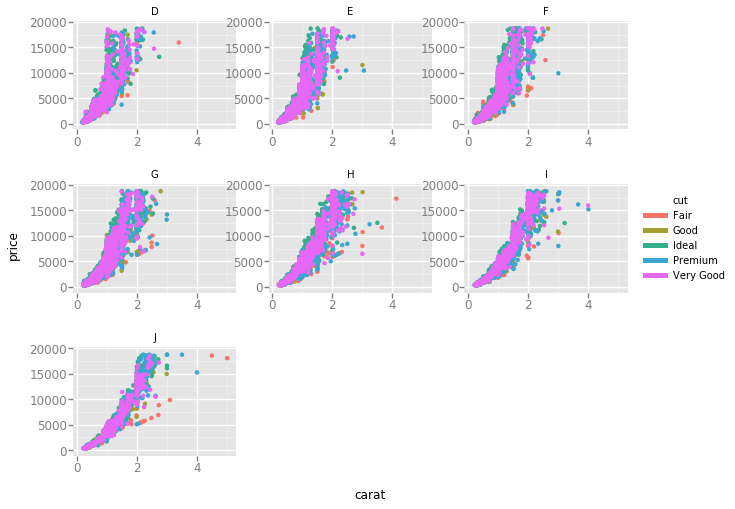

<ggplot: (303805704)>

In [12]:
(diamonds >> ggplot(aes(x = "carat", 
                        y = "price", 
                        color = "cut"),
                   data = X._) + 
             geom_point() + 
             facet_wrap("color"))

### 将整个数据框传递给pylab进行绘图

In [13]:
import pylab as pl

In [14]:
pl.scatter = DelayFunction(pl.scatter)

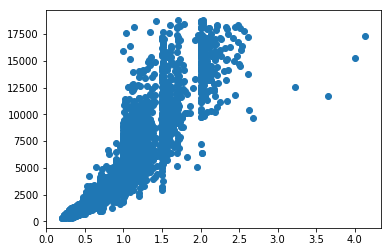

In [15]:
diamonds >> sample_frac(0.1) >> pl.scatter(X.carat, X.price)

## pandas-ply包

In [16]:
import pandas as pd 
from pandas_ply import install_ply, X, sym_call
install_ply(pd)

### ply_select()
首先读取 R 的feather数据
R方面需要使用下面的代码生成 flights.feather 文件
```r
nycflights13::flights %>% feather::write_feather("flights.feather")
```

In [17]:
import feather
flights = feather.read_dataframe('flights.feather')

In [18]:
flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00-05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00-05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00-05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00-05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00-05:00


In [19]:
(flights
    .groupby(['year', 'month', 'day'])
    .ply_select(
        arr = X.arr_delay.mean(),
        dep = X.dep_delay.mean())
    .ply_where(X.arr > 30, X.dep > 30)
    .head(5))

arr        dep
year month day                      
2013 2     11   36.290094  39.073598
           27   31.252492  37.763274
     3     8    85.862155  83.536921
           18   41.291892  30.117960
     4     10   38.412311  33.023675

使用pandas实现上面的操纵：

In [20]:
grouped_flights = flights.groupby(["year", "month", "day"])
output = pd.DataFrame()
output['arr'] = grouped_flights.arr_delay.mean()
output['dep'] = grouped_flights.dep_delay.mean()
filtered_output = output[(output.arr > 30) & (output.dep > 30)]
filtered_output.head(5)

arr        dep
year month day                      
2013 2     11   36.290094  39.073598
           27   31.252492  37.763274
     3     8    85.862155  83.536921
           18   41.291892  30.117960
     4     10   38.412311  33.023675

In [21]:
# '*'表示选择所有列
flights.ply_select('*',
                  gain = X.arr_delay - X.dep_delay,
                  speed = X.distance / X.air_time * 60).head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00-05:00,9.0,370.044053
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00-05:00,16.0,374.273128
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00-05:00,31.0,408.375000
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00-05:00,-17.0,516.721311
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00-05:00,-19.0,394.137931


### ply_where()

In [22]:
flights.ply_where(X.month == 1, X.day == 1).head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00-05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00-05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00-05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00-05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00-05:00
